In [1]:
import numpy as np
import sympy as sym

In [2]:
th, kxx, kxy, kxz, kyy, kyz, kzz = sym.symbols('th, kxx, kxy, kxz, kyy, kyz, kzz')

In [3]:
Q = sym.Matrix([[1, 0, 0],[0, sym.cos(th), -sym.sin(th)],[0, sym.sin(th), sym.cos(th)]])
ts = sym.Matrix([[kxx, kxy, kxz], [kxy, kyy, kyz], [kxz, kyz, kzz]])

In [4]:
print('Tensor ts: ', ts, sep = "\n")
print('Rotate an angle th along x-axis in yz-plane:')
print('Rotation matrix Q = ', Q, sep = "\n")
print('Q * ts * Q.T = ')
#ts_r

Tensor ts: 
Matrix([[kxx, kxy, kxz], [kxy, kyy, kyz], [kxz, kyz, kzz]])
Rotate an angle th along x-axis in yz-plane:
Rotation matrix Q = 
Matrix([[1, 0, 0], [0, cos(th), -sin(th)], [0, sin(th), cos(th)]])
Q * ts * Q.T = 


NameError: name 'ts_r' is not defined

In [5]:
ts_r = Q * ts * Q.T

In [6]:
Matrix(ts_r)

NameError: name 'Matrix' is not defined

In [7]:
def cosd(angle_degrees):
    return np.cos(angle_degrees/180*np.pi)
def sind(angle_degrees):
    return np.sin(angle_degrees/180*np.pi)

In [85]:
eqs = []
angles = [0, 10, 20, 30, 45, 60]
for ang in angles:
    eq = kxx * ts_r[1,1].subs(th, ang / 180 * np.pi) - (ts_r[0,1].subs(th, ang / 180 * np.pi)**2)
    eqs.append(eq)

In [36]:
eqs

[kxx*kyy - kxy**2,
 kxx*(0.969846310392954*kyy - 0.342020143325669*kyz + 0.0301536896070458*kzz) - (0.984807753012208*kxy - 0.17364817766693*kxz)**2,
 kxx*(0.883022221559489*kyy - 0.642787609686539*kyz + 0.116977778440511*kzz) - (0.939692620785908*kxy - 0.342020143325669*kxz)**2,
 kxx*(0.75*kyy - 0.866025403784439*kyz + 0.25*kzz) - (0.866025403784439*kxy - 0.5*kxz)**2,
 kxx*(0.5*kyy - 1.0*kyz + 0.5*kzz) - (0.707106781186548*kxy - 0.707106781186547*kxz)**2,
 kxx*(3.74939945665464e-33*kyy - 1.22464679914735e-16*kyz + 1.0*kzz) - (6.12323399573677e-17*kxy - 1.0*kxz)**2]

In [10]:
# eqs2 = [eq - 1 for eq in eqs]
# eqs2.append(kxx - 1)

In [38]:
solution = sym.solve(eqs2, (kxx, kxy, kxz, kyy, kyz, kzz))
solution

[]

In [125]:
x,y = sym.symbols('x,y')
solution = sym.solve([1*x + 0.2*y-1, 0.75*x + 0.5*y-1], (x,y))
solution

{x: 0.857142857142857, y: 0.714285714285714}

In [19]:
ts_3 = ts_r.subs([(kxx,1),(kxy,0), (kxz,0), (kyy, 1), (kyz, 0), (kzz, 2)])
ts_3

Matrix([
[1,                         0,                         0],
[0, 2*sin(th)**2 + cos(th)**2,          -sin(th)*cos(th)],
[0,          -sin(th)*cos(th), sin(th)**2 + 2*cos(th)**2]])

In [39]:
angles = [0, 10, 20, 30, 45, 90]
detks = []
for ang in angles:
    detk = 1 * ts_3[1,1].subs(th, ang / 180 * np.pi) - (ts_3[0,1].subs(th, ang / 180 * np.pi)**2)
    detks.append(detk)


In [48]:
eqs2 = [eqs[i] - detks[i] for i in range(0, len(eqs), 1)]
eqs2.append(kxx - 1)
eqs3 = eqs
eqs3.append(kxx - 1)
eqs2

[kxx*kyy - kxy**2 - 1,
 kxx*(0.969846310392954*kyy - 0.342020143325669*kyz + 0.0301536896070458*kzz) - (0.984807753012208*kxy - 0.17364817766693*kxz)**2 - 1.03015368960705,
 kxx*(0.883022221559489*kyy - 0.642787609686539*kyz + 0.116977778440511*kzz) - (0.939692620785908*kxy - 0.342020143325669*kxz)**2 - 1.11697777844051,
 kxx*(0.75*kyy - 0.866025403784439*kyz + 0.25*kzz) - (0.866025403784439*kxy - 0.5*kxz)**2 - 1.25,
 kxx*(0.5*kyy - 1.0*kyz + 0.5*kzz) - (0.707106781186548*kxy - 0.707106781186547*kxz)**2 - 1.5,
 kxx*(3.74939945665464e-33*kyy - 1.22464679914735e-16*kyz + 1.0*kzz) - (6.12323399573677e-17*kxy - 1.0*kxz)**2 - 2.0,
 kxx - 1]

In [42]:
solution = sym.solve(eqs2, (kxx, kxy, kxz, kyy, kyz, kzz))
solution

[]

In [45]:
sym.Matrix(eqs)

Matrix([
[                                                                                                                kxx*kyy - kxy**2],
[kxx*(0.969846310392954*kyy - 0.342020143325669*kyz + 0.0301536896070458*kzz) - (0.984807753012208*kxy - 0.17364817766693*kxz)**2],
[kxx*(0.883022221559489*kyy - 0.642787609686539*kyz + 0.116977778440511*kzz) - (0.939692620785908*kxy - 0.342020143325669*kxz)**2],
[                                        kxx*(0.75*kyy - 0.866025403784439*kyz + 0.25*kzz) - (0.866025403784439*kxy - 0.5*kxz)**2],
[                                          kxx*(0.5*kyy - 1.0*kyz + 0.5*kzz) - (0.707106781186548*kxy - 0.707106781186547*kxz)**2],
[                   kxx*(3.74939945665464e-33*kyy - 1.22464679914735e-16*kyz + 1.0*kzz) - (6.12323399573677e-17*kxy - 1.0*kxz)**2]])

In [55]:
eqs3 = [eq.subs(kxx, 1) for eq in eqs]
eqs3

[-kxy**2 + kyy,
 0.969846310392954*kyy - 0.342020143325669*kyz + 0.0301536896070458*kzz - (0.984807753012208*kxy - 0.17364817766693*kxz)**2,
 0.883022221559489*kyy - 0.642787609686539*kyz + 0.116977778440511*kzz - (0.939692620785908*kxy - 0.342020143325669*kxz)**2,
 0.75*kyy - 0.866025403784439*kyz + 0.25*kzz - (0.866025403784439*kxy - 0.5*kxz)**2,
 0.5*kyy - 1.0*kyz + 0.5*kzz - (0.707106781186548*kxy - 0.707106781186547*kxz)**2,
 3.74939945665464e-33*kyy - 1.22464679914735e-16*kyz + 1.0*kzz - (6.12323399573677e-17*kxy - 1.0*kxz)**2]

In [159]:
eqs = []
angles = [10, 13, 25, 38, 46, 135]
for ang in angles:
    eq = kxx * ts_r[1,1].subs(th, ang / 180 * np.pi) - (ts_r[0,1].subs(th, ang / 180 * np.pi)**2)
    eqs.append(eq)
eqs2 = [eqs[i] - detks[i] for i in range(0, len(eqs), 1)]
eqs3 = [sym.expand(eq.subs(kxx,1)) for eq in eqs2]
eqs3

[-0.969846310392954*kxy**2 + 0.342020143325669*kxy*kxz - 0.0301536896070458*kxz**2 + 0.969846310392954*kyy - 0.342020143325669*kyz + 0.0301536896070458*kzz - 1,
 -0.949397023149584*kxy**2 + 0.438371146789077*kxy*kxz - 0.0506029768504165*kxz**2 + 0.949397023149584*kyy - 0.438371146789077*kyz + 0.0506029768504165*kzz - 1.03015368960705,
 -0.82139380484327*kxy**2 + 0.766044443118978*kxy*kxz - 0.17860619515673*kxz**2 + 0.82139380484327*kyy - 0.766044443118978*kyz + 0.17860619515673*kzz - 1.11697777844051,
 -0.620960947799834*kxy**2 + 0.970295726275996*kxy*kxz - 0.379039052200166*kxz**2 + 0.620960947799834*kyy - 0.970295726275996*kyz + 0.379039052200166*kzz - 1.25,
 -0.48255025164875*kxy**2 + 0.999390827019096*kxy*kxz - 0.51744974835125*kxz**2 + 0.48255025164875*kyy - 0.999390827019096*kyz + 0.51744974835125*kzz - 1.5,
 -0.5*kxy**2 - 1.0*kxy*kxz - 0.5*kxz**2 + 0.5*kyy + 1.0*kyz + 0.5*kzz - 2.0]

In [160]:
M, b = sym.linear_eq_to_matrix(eqs3, [kyy, kyz, kzz, kxy**2, kxz**2, kxy * kxz])
M

Matrix([
[0.969846310392954, -0.342020143325669, 0.0301536896070458, -0.969846310392954, -0.0301536896070458, 0.342020143325669],
[0.949397023149584, -0.438371146789077, 0.0506029768504165, -0.949397023149584, -0.0506029768504165, 0.438371146789077],
[ 0.82139380484327, -0.766044443118978,   0.17860619515673,  -0.82139380484327,   -0.17860619515673, 0.766044443118978],
[0.620960947799834, -0.970295726275996,  0.379039052200166, -0.620960947799834,  -0.379039052200166, 0.970295726275996],
[ 0.48255025164875, -0.999390827019096,   0.51744974835125,  -0.48255025164875,   -0.51744974835125, 0.999390827019096],
[              0.5,                1.0,                0.5,               -0.5,                -0.5,              -1.0]])

In [181]:
M[3:,[2,3,4]].det()

0

In [108]:
M2 = sym.Matrix([[0.97,-0.34, 0, -0.985**2, -0.174**2, 2 * 0.985 * 0.174], 
           [0.883, -0.643, 0.117, -0.94**2, -0.342**2, 2 * 0.94 * 0.342],
            [0.75, -0.866, 0.25, -0.866**2, -0.5**2, 2 * 0.866 * 0.5],
            [0.5, -1, 0.5, -0.707**2, -0.707**2, 2 * 0.707 * 0.707],
            [0, 0, 1, 0, 1, 0],
            [1, 0, 0, -1, 0, 0]])

In [109]:
M2.det()

-1.72932823537322e-6

In [117]:
M2 = sym.Matrix([[0.97,-0.34, 0],
            [0.75, -0.866, 0.25],
            [0.5, -1, 0.5]])
M2.det()

-0.0925100000000000

In [129]:
sym.Matrix([[1,0.2],[0.75,0.2]])

0.0500000000000000

In [121]:
x = np.linspace(0,180, 100)
import matplotlib.pyplot as plt

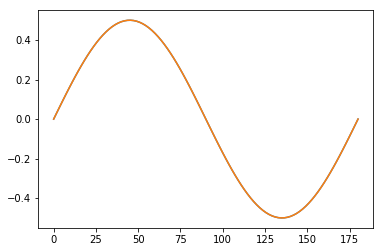

In [124]:
plt.plot(x, np.sin(x / 180 * np.pi) * np.cos(x / 180 * np.pi))
plt.show()

In [141]:
eqs = []
angles = sym.symbols('th1, th2, th3, th4, th5, th6')
for ang in angles:
    eq = kxx * ts_r[1,1].subs(th, ang / 180 * np.pi) - (ts_r[0,1].subs(th, ang / 180 * np.pi)**2)
    eqs.append(eq)
eqs2 = [eqs[i] - detks[i] for i in range(0, len(eqs), 1)]
eqs3 = [sym.expand(eq.subs(kxx,1)) for eq in eqs2]
eqs3

[-kxy**2*cos(0.0174532925199433*th1)**2 + 2*kxy*kxz*sin(0.0174532925199433*th1)*cos(0.0174532925199433*th1) - kxz**2*sin(0.0174532925199433*th1)**2 + kyy*cos(0.0174532925199433*th1)**2 - 2*kyz*sin(0.0174532925199433*th1)*cos(0.0174532925199433*th1) + kzz*sin(0.0174532925199433*th1)**2 - 1,
 -kxy**2*cos(0.0174532925199433*th2)**2 + 2*kxy*kxz*sin(0.0174532925199433*th2)*cos(0.0174532925199433*th2) - kxz**2*sin(0.0174532925199433*th2)**2 + kyy*cos(0.0174532925199433*th2)**2 - 2*kyz*sin(0.0174532925199433*th2)*cos(0.0174532925199433*th2) + kzz*sin(0.0174532925199433*th2)**2 - 1.03015368960705,
 -kxy**2*cos(0.0174532925199433*th3)**2 + 2*kxy*kxz*sin(0.0174532925199433*th3)*cos(0.0174532925199433*th3) - kxz**2*sin(0.0174532925199433*th3)**2 + kyy*cos(0.0174532925199433*th3)**2 - 2*kyz*sin(0.0174532925199433*th3)*cos(0.0174532925199433*th3) + kzz*sin(0.0174532925199433*th3)**2 - 1.11697777844051,
 -kxy**2*cos(0.0174532925199433*th4)**2 + 2*kxy*kxz*sin(0.0174532925199433*th4)*cos(0.01745329251

In [142]:
M, b = sym.linear_eq_to_matrix(eqs3, [kyy, kyz, kzz, kxy**2, kxz**2, kxy * kxz])
M

Matrix([
[cos(0.0174532925199433*th1)**2, -2*sin(0.0174532925199433*th1)*cos(0.0174532925199433*th1), sin(0.0174532925199433*th1)**2, -cos(0.0174532925199433*th1)**2, -sin(0.0174532925199433*th1)**2, 2*sin(0.0174532925199433*th1)*cos(0.0174532925199433*th1)],
[cos(0.0174532925199433*th2)**2, -2*sin(0.0174532925199433*th2)*cos(0.0174532925199433*th2), sin(0.0174532925199433*th2)**2, -cos(0.0174532925199433*th2)**2, -sin(0.0174532925199433*th2)**2, 2*sin(0.0174532925199433*th2)*cos(0.0174532925199433*th2)],
[cos(0.0174532925199433*th3)**2, -2*sin(0.0174532925199433*th3)*cos(0.0174532925199433*th3), sin(0.0174532925199433*th3)**2, -cos(0.0174532925199433*th3)**2, -sin(0.0174532925199433*th3)**2, 2*sin(0.0174532925199433*th3)*cos(0.0174532925199433*th3)],
[cos(0.0174532925199433*th4)**2, -2*sin(0.0174532925199433*th4)*cos(0.0174532925199433*th4), sin(0.0174532925199433*th4)**2, -cos(0.0174532925199433*th4)**2, -sin(0.0174532925199433*th4)**2, 2*sin(0.0174532925199433*th4)*cos(0.01745329251

In [155]:
M[2:,2:].det()

0